<a href="https://colab.research.google.com/github/Shalini-Mirani/ADSLAB/blob/main/ADSEXP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 The SMOTE technique has been used here to address the class imbalance issue in the diabetes dataset. After using SMOTE, the logistic regression model has been trained and evaluated.

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0    500
1    268
Name: Outcome, dtype: int64

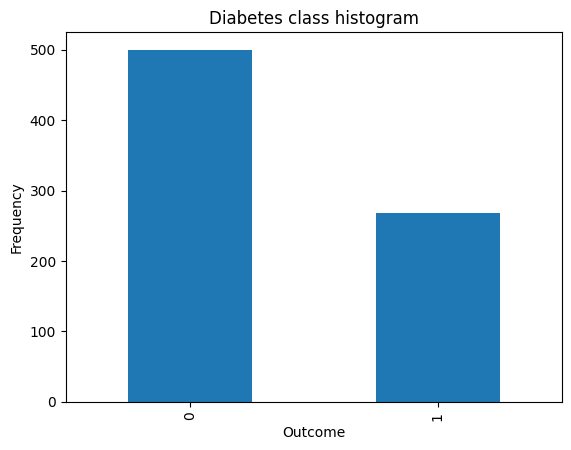

In [5]:
pd.value_counts(df['Outcome']).plot.bar()
plt.title('Diabetes class histogram')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
df['Outcome'].value_counts()

In [12]:
from sklearn.preprocessing import StandardScaler
# Apply StandardScaler to specified columns
scaler = StandardScaler()
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(df[['Pregnancies',
                                                                          'Glucose', 'BloodPressure',
                                                                          'SkinThickness', 'Insulin',
                                                                          'BMI', 'DiabetesPedigreeFunction', 'Age']])


# Display the modified DataFrame
print(df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


In [14]:
# Create feature matrix X and target vector y
X = df.drop('Outcome', axis=1).values  # Selecting all columns except 'Outcome'
y = df['Outcome'].values  # Selecting only the 'Outcome' column

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (768, 8)
Shape of y: (768,)


In [15]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (537, 8)
Number transactions y_train dataset:  (537,)
Number transactions X_test dataset:  (231, 8)
Number transactions y_test dataset:  (231,)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create SMOTE object
smote = SMOTE(random_state=0)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       157
           1       0.59      0.69      0.63        74

    accuracy                           0.74       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.76      0.74      0.75       231



In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled==0)))

Before OverSampling, counts of label '1': 194
Before OverSampling, counts of label '0': 343 

After OverSampling, the shape of train_X: (686, 8)
After OverSampling, the shape of train_y: (686,) 

After OverSampling, counts of label '1': 343
After OverSampling, counts of label '0': 343
